<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/4_Problems/2_07_Pandas Merge DataFrames.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [110]:
# Importing Libraries
import pandas as pd
import locale
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# Ustawienie lokalizacji na angielską (Stany Zjednoczone)
locale.setlocale(locale.LC_TIME, 'en_US.UTF-8')

'en_US.UTF-8'

In [111]:
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


## 🟩 Merge US Jobs and Monthly Postings (2.7.1)

In [112]:
df_US = pd.read_csv('https://lukeb.co/software_csv')
df_US.columns


Index(['job_posted_month', 'Front-End Developer', 'Back-End Developer',
       'Full-Stack Developer', 'UI/UX Designer'],
      dtype='object')

In [113]:
#pd.to_datetime(df_US['job_posted_month'], format='%B')#.strftime('%m')
df_US['job_posted_month'] = pd.to_datetime(df_US['job_posted_month'] + ' 1 2000', format='mixed')
#df_US['job_posted_month'].dt.strftime('%b')
df_US


,job_posted_month,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
0,2000-01-01,13619,9827,5108,4348
1,2000-02-01,11456,9116,7298,4284
2,2000-03-01,11102,8178,5814,4159
3,2000-04-01,14037,9209,7232,4220
4,2000-05-01,12126,8864,6718,4980
5,2000-06-01,12003,8065,5902,4781
6,2000-07-01,11914,8061,6839,4344
7,2000-08-01,11571,8191,7413,4104
8,2000-09-01,14016,8447,6139,4094
9,2000-10-01,11419,8476,5026,4389


In [114]:
df_US['job_posted_month'] = df_US['job_posted_month'].dt.strftime('%m')
#df_US = df_US.set_index('job_posted_month')
df_US

,job_posted_month,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
0,01,13619,9827,5108,4348
1,02,11456,9116,7298,4284
2,03,11102,8178,5814,4159
3,04,14037,9209,7232,4220
4,05,12126,8864,6718,4980
5,06,12003,8065,5902,4781
6,07,11914,8061,6839,4344
7,08,11571,8191,7413,4104
8,09,14016,8447,6139,4094
9,10,11419,8476,5026,4389


In [115]:
df['job_posted_month'] = df['job_posted_date'].dt.strftime('%m')
df_pivot_main = df[df['job_country'] == 'United States'].pivot_table(
    index='job_posted_month', 
    columns='job_title_short',
    aggfunc='size'
    )


In [116]:
top_3_jobs_data = df_pivot_main.sum(axis=0).sort_values(ascending=False).head(3).index.to_list()
df_pivot_top = df_pivot_main[top_3_jobs_data]

df_pivot_top


job_title_short,Data Analyst,Data Scientist,Data Engineer
job_posted_month,,,
01,8494,6915,2655
02,6124,4956,3060
03,6218,4779,3183
04,6049,4867,2801
05,4993,4377,2976
06,5683,4645,2893
07,5201,4876,2570
08,6634,6318,3269
09,4639,4568,3224


In [133]:
df_US



,job_posted_month,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
0,01,13619,9827,5108,4348
1,02,11456,9116,7298,4284
2,03,11102,8178,5814,4159
3,04,14037,9209,7232,4220
4,05,12126,8864,6718,4980
5,06,12003,8065,5902,4781
6,07,11914,8061,6839,4344
7,08,11571,8191,7413,4104
8,09,14016,8447,6139,4094
9,10,11419,8476,5026,4389


In [135]:
top_3_jobs_other = df_US.drop(columns='job_posted_month').sum().sort_values(ascending=False).head(3).index.to_list()

df_US_top = df_US[top_3_jobs_other].copy()
df_US_top['job_posted_month'] = df_US['job_posted_month']
df_US_top



,Front-End Developer,Back-End Developer,Full-Stack Developer,job_posted_month
0,13619,9827,5108,01
1,11456,9116,7298,02
2,11102,8178,5814,03
3,14037,9209,7232,04
4,12126,8864,6718,05
5,12003,8065,5902,06
6,11914,8061,6839,07
7,11571,8191,7413,08
8,14016,8447,6139,09
9,11419,8476,5026,10


In [137]:
df_merged = pd.merge(df_pivot_top, df_US_top, how='left', on='job_posted_month')
df_merged

,job_posted_month,Data Analyst,Data Scientist,Data Engineer,Front-End Developer,Back-End Developer,Full-Stack Developer
0,01,8494,6915,2655,13619,9827,5108
1,02,6124,4956,3060,11456,9116,7298
2,03,6218,4779,3183,11102,8178,5814
3,04,6049,4867,2801,14037,9209,7232
4,05,4993,4377,2976,12126,8864,6718
5,06,5683,4645,2893,12003,8065,5902
6,07,5201,4876,2570,11914,8061,6839
7,08,6634,6318,3269,11571,8191,7413
8,09,4639,4568,3224,14016,8447,6139
9,10,5271,4882,3015,11419,8476,5026


(0.0, 15000.0)

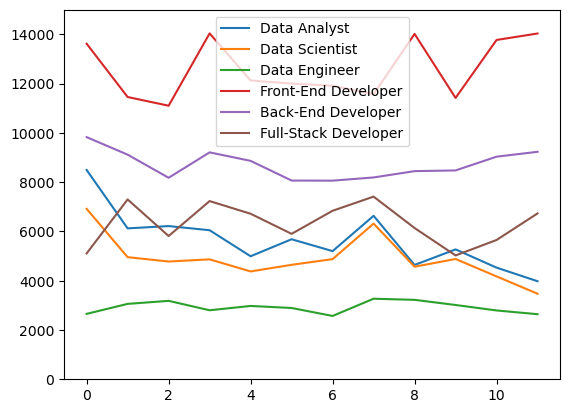

In [138]:

df_merged.plot(kind='line')
plt.ylim(0,15_000)

---

## 🟨 Merge Non-Remote Jobs and Salary (2.7.2)

In [139]:
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,06
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",01
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],...",10
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",07
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl...",08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete...",03
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi...",03
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}",03
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh...",03


In [ ]:
df_non_remote = df[
    (df['job_work_from_home'] == False) & 
    (df['salary_year_avg'].notna())
    ]

28        08
77        06
100       07
146       10
180       02
          ..
785624    08
785641    01
785648    04
785682    03
785692    04
Name: job_posted_month, Length: 18724, dtype: object

In [153]:
df_non_remote_pivot = df_non_remote.pivot_table(
    index='job_posted_month', 
    values='salary_year_avg',
    aggfunc=['median', 'count'])

<Axes: xlabel='job_posted_month'>

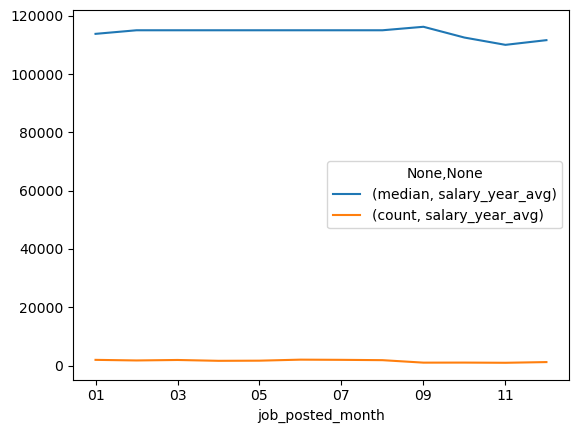

In [154]:
df_non_remote_pivot.plot()

---

## 🟨 Merge Company Salary and Remote Count (2.7.3)

---